In [28]:
from keras.datasets import boston_housing
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
np.load = np_load_old

In [29]:
X_train.shape

(404, 13)

In [30]:
X_test.shape

(102, 13)

In [31]:
y_train.shape

(404,)

In [32]:
y_test.shape

(102,)

In [33]:
#Split training data into training and validation sets
partial_X_train = X_train[:324]
partial_y_train = y_train[:324]
X_val = X_train[324:]
y_val = y_train[324:]

Build a multilayer neural network. Compile with these options. optimizer='rmsprop', loss='mse'

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32,activation='linear'))
model.add(layers.Dense(32,activation='linear'))
model.add(layers.Dense(1,activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

history = model.fit(partial_X_train,partial_y_train,batch_size=32, epochs=500, validation_data=(X_val,y_val))



000e+00
Epoch 361/500
324/324 [==============================] - 0s 86us/step - loss: 50.7380 - acc: 0.0000e+00 - val_loss: 149.8531 - val_acc: 0.0000e+00
Epoch 362/500
324/324 [==============================] - 0s 89us/step - loss: 50.8135 - acc: 0.0000e+00 - val_loss: 72.3511 - val_acc: 0.0250
Epoch 363/500
324/324 [==============================] - 0s 96us/step - loss: 54.9976 - acc: 0.0062 - val_loss: 68.6072 - val_acc: 0.0000e+00
Epoch 364/500
324/324 [==============================] - 0s 93us/step - loss: 44.2100 - acc: 0.0062 - val_loss: 49.0867 - val_acc: 0.0000e+00
Epoch 365/500
324/324 [==============================] - 0s 83us/step - loss: 39.4836 - acc: 0.0062 - val_loss: 51.8622 - val_acc: 0.0250
Epoch 366/500
324/324 [==============================] - 0s 93us/step - loss: 54.2541 - acc: 0.0216 - val_loss: 44.3785 - val_acc: 0.0375
Epoch 367/500
324/324 [==============================] - 0s 96us/step - loss: 47.1423 - acc: 0.0154 - val_loss: 64.2095 - val_acc: 0.0000e+00
E

Show a MSE loss

In [35]:
results = model.evaluate(X_test, y_test)
results

102/102 [==============================] - 0s 49us/step


[66.58574242685356, 0.00980392156862745]

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\551\\lib\\site-packages\\matplotlib\\pyplot.py'>

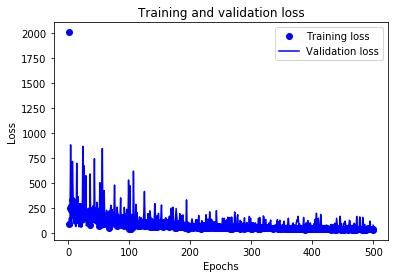

In [36]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt